In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from greedyPolicy import GreedyPolicy
from dqnRun import main as dqnMain
import viz

COLORS, PAGE_WIDTH, ROW_HEIGHT = viz.set_plots()


#rolling mean in numpy:

def rolling_mean(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')


In [21]:
prices = pd.read_csv("../data/prices.csv", index_col=0, parse_dates=True)
prices2023 = prices.loc[
        f"2023-01-01" :f"2023-01-10"
    ].lmp

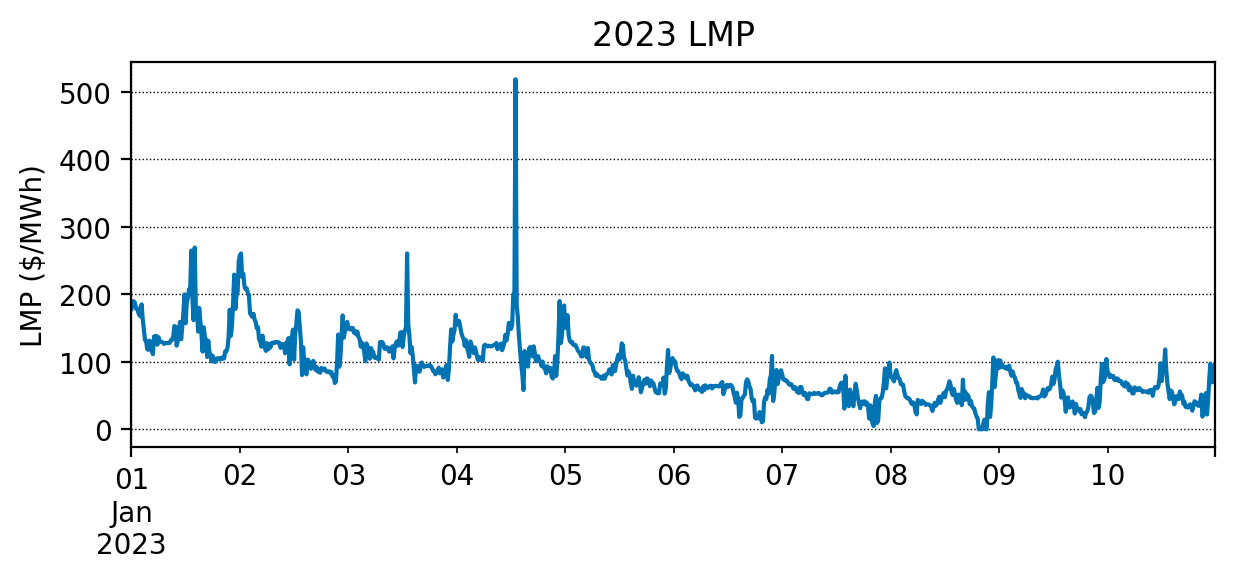

In [22]:
f, ax = plt.subplots(1, 1, figsize=(PAGE_WIDTH, ROW_HEIGHT))
prices2023.plot(ax=ax)
ax.set_title("2023 LMP")
ax.set_ylabel("LMP ($/MWh)")
plt.show()

# 01. Greedy Algorithm

In [5]:
# Run the greedy algorithm:

MonthlyRewards = []
for _ in range(10):
    greedy = GreedyPolicy(prices2023)
    greedy.run()
    print(round(greedy.station.history.reward.sum()/1e3,2))
    MonthlyRewards.append(round(greedy.station.history.reward.sum()/1e3,2))

100%|██████████| 2976/2976 [00:02<00:00, 1058.16it/s]


10.98


100%|██████████| 2976/2976 [00:02<00:00, 1080.52it/s]


10.92


100%|██████████| 2976/2976 [00:02<00:00, 1021.88it/s]


10.71


100%|██████████| 2976/2976 [00:02<00:00, 1021.54it/s]


11.3


100%|██████████| 2976/2976 [00:02<00:00, 1078.36it/s]


10.6


100%|██████████| 2976/2976 [00:02<00:00, 1009.16it/s]


11.28


100%|██████████| 2976/2976 [00:02<00:00, 1052.44it/s]


11.03


100%|██████████| 2976/2976 [00:02<00:00, 1019.63it/s]


10.65


100%|██████████| 2976/2976 [00:03<00:00, 988.88it/s] 


11.25


100%|██████████| 2976/2976 [00:02<00:00, 1062.70it/s]

10.92


In [6]:
print("Total Benefits:", round(np.mean(MonthlyRewards),2), "k$")

Total Benefits: 10.96 k$


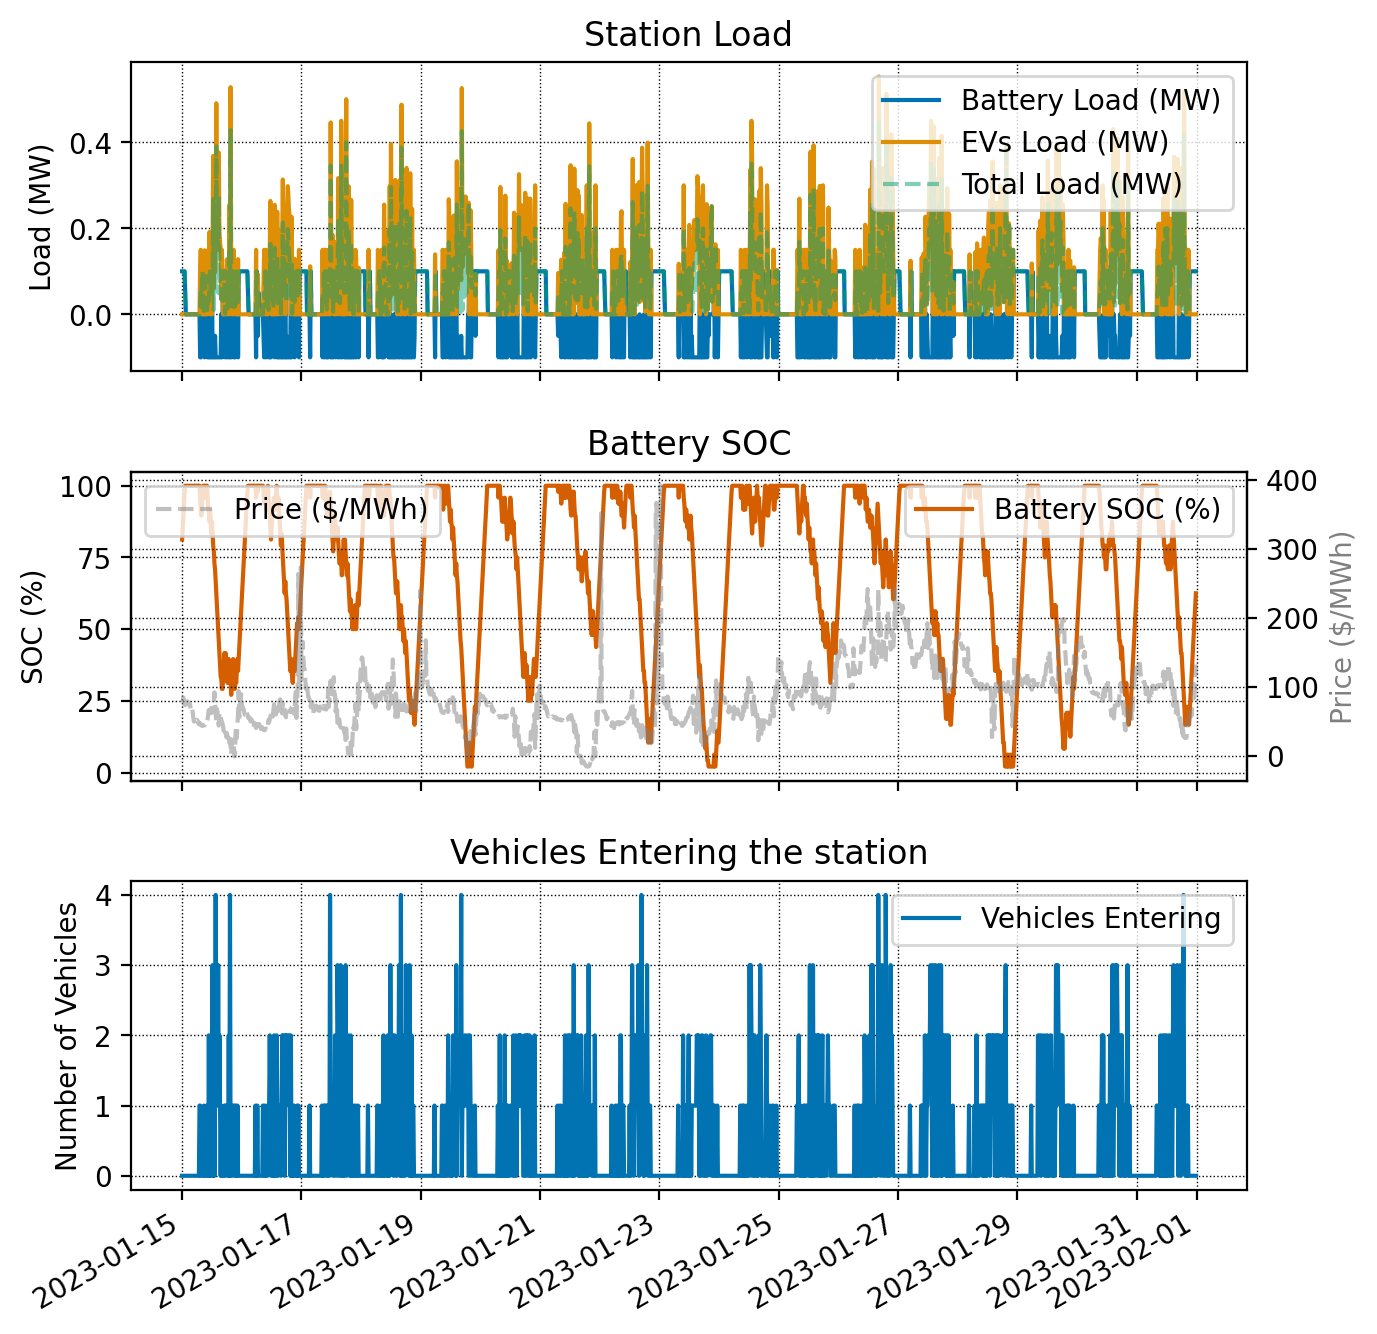

In [7]:
START, END = "2023-01-15", "2023-01-31"

viz.plotOperations(greedy.station.history, START, END, save_path="GreedyResults/greedy_policy.png")

# 02. Deep Q-Learning

In [65]:
from DQNPolicy import DQNPolicy


rewards = []

for _ in range(10):
    policy = DQNPolicy([], pricesTest=prices2023, network_dict="DQNResults/dqn_model.pth")
    policy.run(prices2023)
    rewards.append(round(policy.station.history.reward.sum()/1e3,2))
    print(rewards[-1])

3.37
3.66
3.52
3.36
3.45
3.67
3.39
3.51
3.58


KeyboardInterrupt: 

# 03. Policy Gradient

In [39]:
from pgRun import main as pgMain

pgMain(nYears = None, nMonths = 5, month = [1], test = 1, NEpisodes = 1, num_batches = 100)

100%|██████████| 100/100 [00:09<00:00, 10.17it/s]


0
Total profit: 11433.722337183111
Mean profit: 11433.722337183111


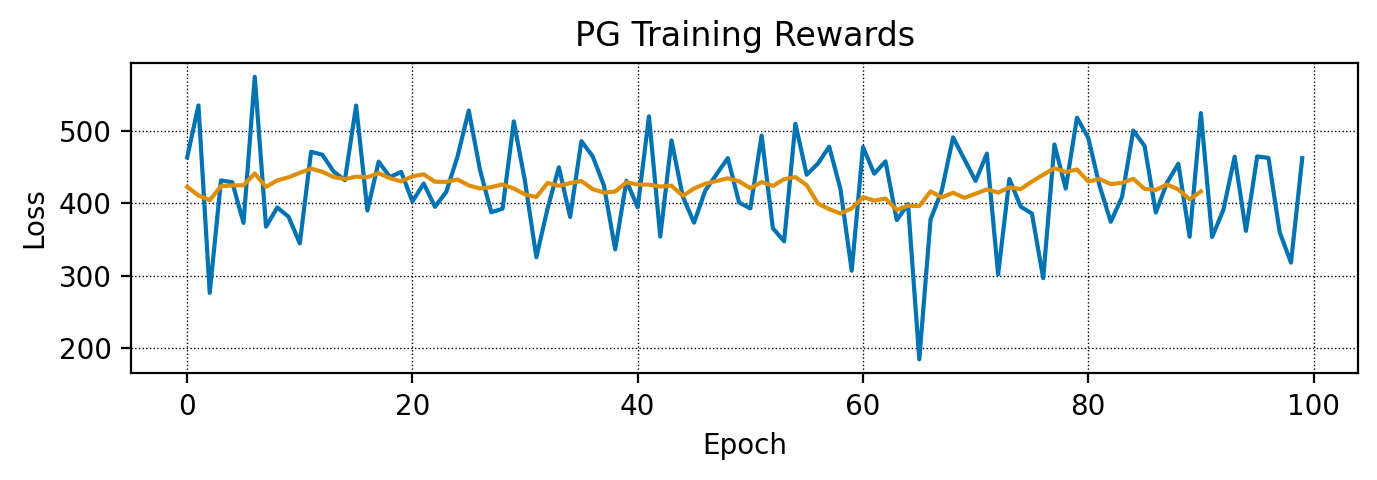

In [40]:
rewards = np.load("PGResults/pg_rewards.npy")

f, ax = plt.subplots(1, 1, figsize=(PAGE_WIDTH, ROW_HEIGHT))
ax.plot(rewards, label="Loss")
ax.plot(rolling_mean(rewards, 10), label="Rolling Mean")
ax.set_title("PG Training Rewards")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
plt.tight_layout()
f.savefig("PGResults/pg_rewards.png")
plt.show()

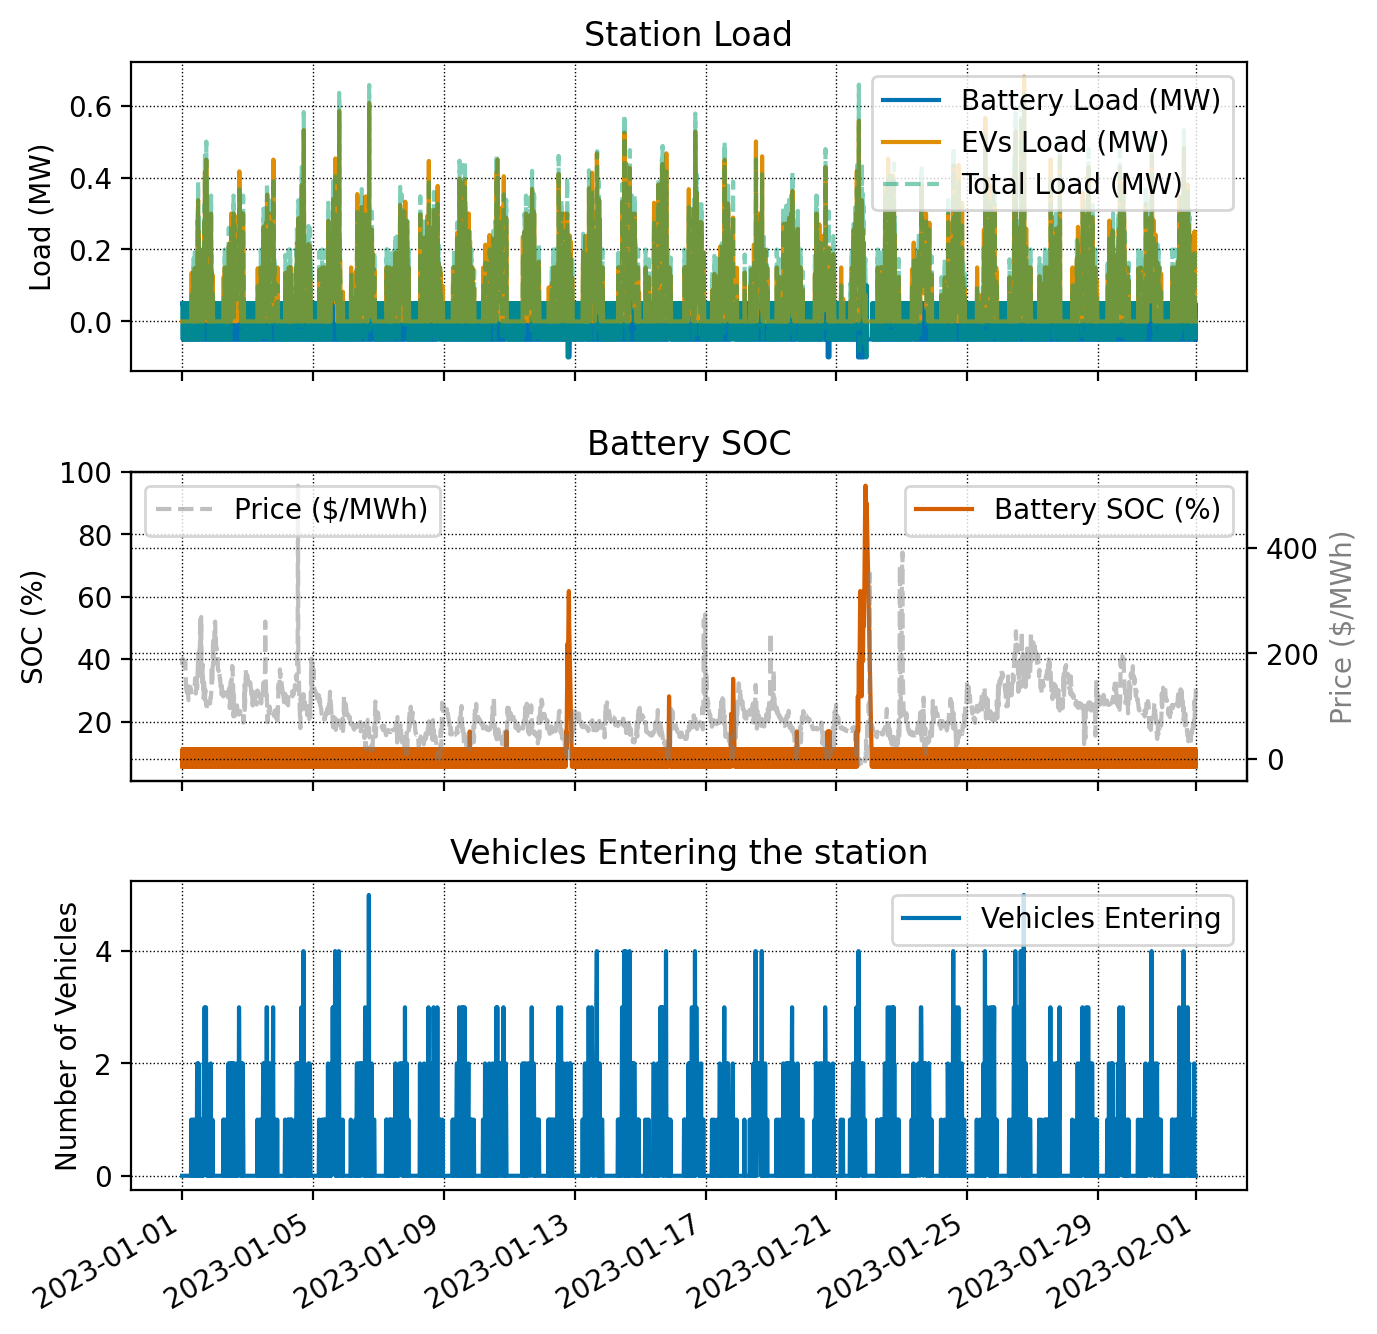

In [41]:
history = pd.read_csv("PGResults/pg_history.csv", index_col=0, parse_dates=True)

START, END = "2023-01-01", "2023-01-31"

viz.plotOperations(history, START, END, save_path="PGResults/policy.png")

# 04. PPO

In [27]:
from ppoRun import main as ppoMain

ppoMain(nYears=None, nMonths = 10, month= [1], test = 10, NEpisodes = 1, num_batches =50000)

 15%|█▍        | 7451/50000 [17:09<1:37:57,  7.24it/s]


KeyboardInterrupt: 

In [ ]:
rewards = np.load("PPOResults/ppo_rewards.npy")

f, ax = plt.subplots(1, 1, figsize=(PAGE_WIDTH, ROW_HEIGHT))
ax.plot(rewards, label="Loss")
ax.plot(rolling_mean(rewards, 10), label="Rolling Mean")
ax.set_title("PPO Training Loss")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
plt.tight_layout()
f.savefig("PPOResults/ppo_rewards.png")
plt.show()

In [55]:
import pandas as pd

df = pd.read_csv("DQNResults/dqn_history.csv", index_col=0, parse_dates=True)

In [62]:
df.SOC[:10]

2023-01-01 00:00:00+00:00    0.01875
2023-01-01 00:15:00+00:00    0.03750
2023-01-01 00:30:00+00:00    0.01875
2023-01-01 00:45:00+00:00    0.03750
2023-01-01 01:00:00+00:00    0.01875
2023-01-01 01:15:00+00:00    0.03750
2023-01-01 01:30:00+00:00    0.01875
2023-01-01 01:45:00+00:00    0.03750
2023-01-01 02:00:00+00:00    0.01875
2023-01-01 02:15:00+00:00    0.03750
Name: SOC, dtype: float64

In [64]:
0.01875+0.05/0.6*0.25

0.03958333333333333